In [45]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# !unzip drive/MyDrive/study/CNN-Trial/multi4.zip 

In [53]:
################
### SETTINGS ###
################

# Data directoriy
#base_dir = "drive/MyDrive/study/CNN-Trial/multi4/data"
base_dir = "/content/multi4/data"
train_dir = base_dir + "/train"
validation_dir = base_dir + "/validation"
test_dir = base_dir + "/test"

In [49]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

#model.add(layers.Dense(1,activation='sigmoid')) # binary class classification
model.add(layers.Dense(4,activation='softmax'))  # multi class classification

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [54]:
from keras import optimizers
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])

In [55]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode ='sparse'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode ='sparse'
    #class_mode ='categorical'
    
)


Found 2658 images belonging to 4 classes.
Found 1510 images belonging to 4 classes.


In [58]:
# Execute model training
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                              validation_steps=40
                             )

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.6466 - acc: 0.6692

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 104s 1s/step - loss: 0.6466 - acc: 0.6692 - val_loss: 1.3471 - val_acc: 0.4825
Epoch 2/30
100/100 [==============================] - 104s 1s/step - loss: 0.6300 - acc: 0.7052 - val_loss: 0.7244 - val_acc: 0.6950
Epoch 3/30
100/100 [==============================] - 104s 1s/step - loss: 0.5892 - acc: 0.7277 - val_loss: 0.8043 - val_acc: 0.6475
Epoch 4/30
100/100 [==============================] - 104s 1s/step - loss: 0.5275 - acc: 0.7518 - val_loss: 0.8096 - val_acc: 0.6612
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.4885 - acc: 0.7875 - val_loss: 0.6929 - val_acc: 0.7025
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.4442 - acc: 0.8095 - val_loss: 0.8344 - val_acc: 0.6837
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.4050 - acc: 0.8158 - val_loss: 0.7484 - val_acc: 0.7150
Epoch 8/30
100/100 [==============================] - 105s 1s/step - loss: 0.348

In [59]:
model.save('multi4-trial.h5')

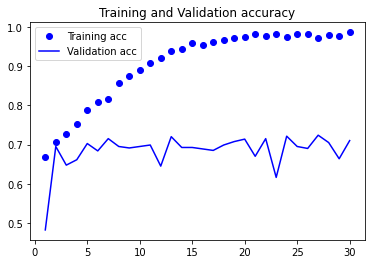

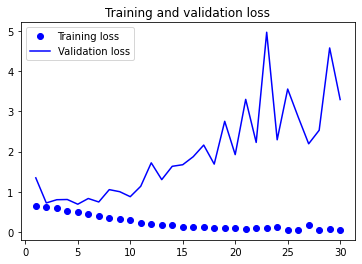

In [60]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc) + 1)

# plot ratio
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1400 images belonging to 4 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.7049999833106995
